# Preparing

## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#from utils import *
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 2.5})
# matplotlib.rcdefaults()

In [2]:
'''
LOGDIR = '../trace-data'
DATE_FORMAT_STR = '%Y-%m-%d %H:%M:%S'
MINUTES_PER_DAY = (24 * 60)
MICROSECONDS_PER_MINUTE = (60 * 1000)
'''

"\nLOGDIR = '../trace-data'\nDATE_FORMAT_STR = '%Y-%m-%d %H:%M:%S'\nMINUTES_PER_DAY = (24 * 60)\nMICROSECONDS_PER_MINUTE = (60 * 1000)\n"

In [3]:
'''
def parse_date(date_str):
    """Parses a date string and returns a datetime object if possible.
    
       Args:
           date_str: A string representing a date.
        
       Returns:
           A datetime object if the input string could be successfully
           parsed, None otherwise.
    """
    if date_str is None or date_str == '' or date_str == 'None':
        return None
    return datetime.datetime.strptime(date_str, DATE_FORMAT_STR)

def timedelta_to_minutes(timedelta):
    """Converts a datetime timedelta object to minutes.
    
       Args:
           timedelta: The timedelta to convert.
           
       Returns:
           The number of minutes captured in the timedelta.
    """
    minutes = 0.0
    minutes += timedelta.days * MINUTES_PER_DAY
    minutes += timedelta.seconds / 60.0
    minutes += timedelta.microseconds / MICROSECONDS_PER_MINUTE
    return minutes

def round_to_nearest_minute(t):
    """Rounds a datetime object down to the nearest minute.
    
       Args:
           t: A datetime object.
           
        Returns:
            A new rounded down datetime object.
    """
    return t - datetime.timedelta(seconds=t.second, microseconds=t.microsecond)

def add_minute(t):
    """Adds a single minute to a datetime object.
    
       Args:
           t: A datetime object.
           
        Returns:
            A new datetime object with an additional minute.
    """
    return t + datetime.timedelta(seconds=60)
'''

'\ndef parse_date(date_str):\n    """Parses a date string and returns a datetime object if possible.\n    \n       Args:\n           date_str: A string representing a date.\n        \n       Returns:\n           A datetime object if the input string could be successfully\n           parsed, None otherwise.\n    """\n    if date_str is None or date_str == \'\' or date_str == \'None\':\n        return None\n    return datetime.datetime.strptime(date_str, DATE_FORMAT_STR)\n\ndef timedelta_to_minutes(timedelta):\n    """Converts a datetime timedelta object to minutes.\n    \n       Args:\n           timedelta: The timedelta to convert.\n           \n       Returns:\n           The number of minutes captured in the timedelta.\n    """\n    minutes = 0.0\n    minutes += timedelta.days * MINUTES_PER_DAY\n    minutes += timedelta.seconds / 60.0\n    minutes += timedelta.microseconds / MICROSECONDS_PER_MINUTE\n    return minutes\n\ndef round_to_nearest_minute(t):\n    """Rounds a datetime objec

In [4]:
#Load the 7 datasets into dataframes
dfj=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_job_table.csv")
dft=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_task_table.csv")
dfi=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_instance_table.csv")
dfs=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_sensor_table.csv")
dfg=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_group_tag_table.csv")
dfp=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_machine_spec.csv")
dfm=pd.read_csv(r"C:\Users\Dell\Documents\Jane\data\pai_machine_metric.csv")

In [5]:
dfb=pd.concat([dfi,dfs],ignore_index=True)

In [6]:
dfb

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
0,54670e2998350a9f0e4868d5,worker,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dde378ac4abad45c,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f764d466128a150f,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273065.0,165261853e188ca69c4fbcdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,54670e2998350a9f0e4868d5,worker,92759a73039692b2d3e0929cadf55f5b07b40d6582c36fdf15c6c1cb493a,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca43813d9ff7f8d56ae,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273056.0,31dbf829549b10917e7193a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54670e2998350a9f0e4868d5,worker,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1b4994b1abbdc88,09d41bf627188adc004b2db7c0a47578325952cc3340af02a351480dae90,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273067.0,31dbf829549b10917e7193a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54670e2998350a9f0e4868d5,worker,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e325bc1b57debff7,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b954283c8648554,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54670e2998350a9f0e4868d5,worker,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc990834becc78b4,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986ce84858c51c4d8,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069722,d0e0a3558abce5d45072863a,PyTorchWorker,NaN,000a541be117d8643e6d830c287b4cd872d59b1cfb47cfbf6a89d841f26b,c99f2b75c7ad053a485cfb87ca55adee17efd3d52bd52d367ba41d4d15a2,NaN,NaN,NaN,1aafda90cc6f46f0f4f90e32,/dev/nvidia0,79.750000,0.0,0.429199,0.747070,0.0,0.0,1.922363e+08,2.869013e+08,21165.800000,19090.600000
4069723,7ff3e872b8be51537beeefde,PyTorchWorker,NaN,4e0e26f837a6c8882a1e672ffd3c3484d1e2d8a83a816d6215b993333cf6,b99050ffacf3f321400a836d0e9f9183d49fa4b695aada7c4f6f29b74f59,NaN,NaN,NaN,12bcc4fceea93a30d7d0f324,/dev/nvidia0,112.500000,0.0,0.329102,0.641602,0.0,0.0,1.696908e+08,2.661021e+08,16798.000000,16447.666667
4069724,a155d69dca6bfd2dfb78ef0d,JupyterTask,NaN,7245da946677b8ed70a486cffd5bb93a2296d652286ecb361b35f2c2486c,267c02fbda06c42fb83fc8034d2be1c51149127deb22921131c009967abf,NaN,NaN,NaN,943fe1a04fa90bf140cb9d85,/dev/nvidia7,6.725577,0.0,2.187771,3.404297,0.0,0.0,9.655890e+06,1.389712e+07,1762.840284,1969.509317
4069725,f11820cc3d678bcdc37faf08,PyTorchWorker,NaN,3fc512df15638907eb4b04a67c28fe77132aed60a53a97bea21e727362a7,d50242c89f3a25bd20ef700701777823c415ad0321dcb37097914bb7cb0b,NaN,NaN,NaN,14c1d6a040a33046698786e1,/dev/nvidia2,73.000000,0.0,0.143555,0.270508,0.0,0.0,6.101400e+07,7.727868e+07,4462.333333,3738.333333


In [7]:
#dfc=dfb.loc[dfb['job_name']=='a155d69dca6bfd2dfb78ef0d']

In [8]:
dfd=(pd.merge(dft,dfs, on='job_name'))

In [9]:
dfd

,job_name,task_name_x,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,task_name_y,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
0,c936346f45eccd34bf748541,tensorflow,1.0,Terminated,2693235.0,2695847.0,600.0,29.296875,50.0,MISC,tensorflow,48c6a3df1e046ca0fb5331b18c1d23f47312e806a623a4395fb45d77c786,990f1799a5093b62142b101c0227875b81c7f0329301df98af1148ec8724,91c8c202d797d341235ee765,/dev/nvidia6,350.353167,77.468451,24.306558,30.613281,4.184025,4.354492,3.515053e+08,2.545430e+06,16733.320000,4261.215238
1,455c3dec270f4777ad67721c,tensorflow,1.0,Terminated,3399583.0,3399732.0,600.0,29.296875,100.0,MISC,tensorflow,60fa808be024e77c81c13a5ae2b336ad35fd837e59cc80621274940e96d0,d94b4b01a6dd6c1865972cd628abe206422143ef37e6d449d4b2e862e574,d73dbda0dd25f3b3ee3e1bba,/dev/nvidia7,117.888889,0.333333,1.870295,2.862305,0.069743,0.836914,8.321684e+08,1.448389e+09,39241.307692,65482.538462
2,ba64aa2f0feff18428923e92,tensorflow,1.0,Terminated,2152271.0,2158213.0,600.0,29.296875,50.0,MISC,tensorflow,6b409158890a93dc245e0860fc9bd18c05e0adb2502fb756485e27f5e9e1,af71dfe31db0378561e1bea2c26605f67cb7611f0d38661b43881a1c6006,9d860e17c50f8226eb853943,/dev/nvidia0,139.502103,4.408403,12.811959,13.503906,4.212840,4.258789,8.437303e+06,5.633549e+07,1812.241611,2192.090604
3,704783be2a4b7f88b8d2e4ee,worker,100.0,Failed,2172980.0,NaN,600.0,9.765625,10.0,MISC,worker,8af8d63050be4502eb06a7a03571fcfb9b112c6da3fc0516b530dc0bf3f7,a63da076c1210109040acf759e2c1d00b8abc2d84305990a5941d0142690,6f60902edf28bdea3fb8b164,/dev/nvidia2,90.543478,9.829787,16.871221,42.729492,0.431267,1.084961,5.272268e+07,1.382984e+07,2102.687500,967.125000
4,704783be2a4b7f88b8d2e4ee,worker,100.0,Failed,2172980.0,NaN,600.0,9.765625,10.0,MISC,worker,c5fe51a2774fd6629699887f2887059e9f61972958913b82b32bca37a715,a63da076c1210109040acf759e2c1d00b8abc2d84305990a5941d0142690,fac33985ac739cf02b7dc2df,/dev/nvidia7,89.739130,20.170213,18.169752,74.735352,0.433511,1.084961,5.276807e+07,1.383096e+07,2319.645833,969.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934587,31271edf22fc09d66691b610,tensorflow,1.0,Terminated,4725236.0,4727490.0,100.0,29.296875,25.0,MISC,tensorflow,ca40e4836c48d312980d93a29facbd14cd981dc8fd5384fa166e044da098,c784fb15b3236a8dc792b0eab24f5f473b03d25d76dc1ed83fd62c6159c3,e251b20ea2e0819ecb8c9a78,/dev/nvidia0,63.042222,0.000000,3.048873,3.234375,0.198406,0.200195,7.457338e+08,9.979172e+05,181462.988987,3993.581498
4934588,f79493b18df6dabdaa578dac,tensorflow,1.0,Failed,4788805.0,NaN,600.0,29.296875,100.0,P100,tensorflow,ca9162f8cc898c758c9764dcb31adb6193ddc26de4474f2cf75eec418497,5dce09bd3b48900c4907976028dde42fd1e15b08e27d4264b75bb4751ff3,692cea068543d1655aab44b0,/dev/nvidia1,93.666667,0.187500,2.704799,4.506836,0.157288,0.838867,9.130185e+08,1.206071e+09,113226.375000,82233.500000
4934589,d14050801987e35369e03724,tensorflow,1.0,Failed,4800428.0,NaN,600.0,29.296875,100.0,P100,tensorflow,285f390c71ddcef3c6d00eac0248c74801ac6fd9f53296d797fc67b84324,61a9ba84b9d32db3a970e3eee322633e039fdb429d89ce92894ef2122ad1,42c59685947400363b47a59b,/dev/nvidia1,73.461538,2.625000,1.946219,3.369141,0.365112,0.973633,1.214225e+09,1.653604e+09,160178.625000,113813.000000
4934590,906db91bc6f3321e94a6b472,tensorflow,1.0,Terminated,4732036.0,4739163.0,600.0,29.296875,10.0,MISC,tensorflow,7383bf1e3c5d2f40dc7899167aa1567c017211e60246512790e614ae4680,07396d56aac1ecf5d65f22b5f53f2a72327dce42195872b0eb8ee973f6b6,16b3cec68193e8b041dcd447,/dev/nvidia4,1637.419698,0.000000,15.379433,38.113281,0.133434,0.133789,3.894292e+06,1.146775e+06,2143.480990,979.076923


In [10]:
#dfe=dfd.loc[dfd['job_name']=='c936346f45eccd34bf748541']

## Join tables

`dfa`: DataFrame of Tasks

In [11]:
#Concatenate (combine) some of the dataframes of tasks to get dataframe dfa
dfa=pd.concat([dft,dfj,dfi,dfg],ignore_index=True)

# dfa.to_csv('dfa.csv') # optional

`dfw`: DataFrame of Workers

In [12]:
#Concatenate (combine) some of the dataframes of workers to get dataframe dfw
dfw=pd.concat([dfi, dft, dfg],ignore_index=True)

# dfw.to_csv('dfw.csv') # optional

In [13]:
#Show the last 5 rows in dfa
dfa.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,inst_id,user,inst_name,worker_name,machine,gpu_type_spec,group,workload
0,c936346f45eccd34bf748541,tensorflow,1.0,Terminated,2693235.0,2695847.0,600.0,29.296875,50.0,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,455c3dec270f4777ad67721c,tensorflow,1.0,Terminated,3399583.0,3399732.0,600.0,29.296875,100.0,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ba64aa2f0feff18428923e92,tensorflow,1.0,Terminated,2152271.0,2158213.0,600.0,29.296875,50.0,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,704783be2a4b7f88b8d2e4ee,worker,100.0,Failed,2172980.0,NaN,600.0,9.765625,10.0,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bce3b9c55772f9d1e85fe796,PyTorchWorker,4.0,Failed,2374681.0,NaN,400.0,10.000000,100.0,V100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Show the last 5 rows in dfw
dfw['job_name']

0          54670e2998350a9f0e4868d5
1          54670e2998350a9f0e4868d5
2          54670e2998350a9f0e4868d5
3          54670e2998350a9f0e4868d5
4          54670e2998350a9f0e4868d5
                     ...           
3352572                         NaN
3352573                         NaN
3352574                         NaN
3352575                         NaN
3352576                         NaN
Name: job_name, Length: 3352577, dtype: object

`dfws`: DataFrame of Worker with sensor data

In [15]:
#Create a dataframe 'dfws' of workers with sensor data
dfws = dfw.merge(dfp.drop(columns={'gpu_type'}), on='machine', how='left')
dfws = dfws.merge(dfs.drop(columns=['job_name','task_name','inst_id','machine']), on='worker_name')
# dfws.to_csv('dfws.csv') # optional

In [16]:
dfws

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine,inst_num,plan_cpu,plan_mem,plan_gpu,gpu_type,user,gpu_type_spec,group,workload,cap_cpu,cap_mem,cap_gpu,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count
0,54670e2998350a9f0e4868d5,worker,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dde378ac4abad45c,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f764d466128a150f,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273065.0,165261853e188ca69c4fbcdf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,2.0,/dev/nvidia0,45.000000,15.882353,0.745052,1.836914,0.367934,1.250977,1.156258e+07,5.106448e+06,3128.000000,698.000000
1,54670e2998350a9f0e4868d5,worker,92759a73039692b2d3e0929cadf55f5b07b40d6582c36fdf15c6c1cb493a,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca43813d9ff7f8d56ae,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273056.0,31dbf829549b10917e7193a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,2.0,/dev/nvidia1,59.818182,12.692308,0.791391,1.825195,0.345478,1.250977,1.310309e+07,5.786064e+06,3541.933333,781.733333
2,54670e2998350a9f0e4868d5,worker,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e325bc1b57debff7,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b954283c8648554,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,2.0,/dev/nvidia1,44.583333,16.571429,0.696638,1.798828,0.242885,0.756836,1.228916e+07,5.424439e+06,3325.937500,732.062500
3,54670e2998350a9f0e4868d5,worker,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc990834becc78b4,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986ce84858c51c4d8,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,2.0,/dev/nvidia1,38.733333,20.625000,0.456665,1.529297,0.294800,0.786133,1.772259e+07,4.578005e+06,4970.111111,979.888889
4,54670e2998350a9f0e4868d5,worker,1753fcfedee1e5f287617ac478dd44ed1898ecbb278d26361949c8057d4b,d4e61397a75bc629099a8a237d1c94e4a05844daff6890d11e8751188d04,68889727c2257f702108d185e5eed342a39807a2893d4bac00987159d00c,Terminated,3272995.0,3273061.0,f1b1d66a13cb0bcc2a7f11b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,2.0,/dev/nvidia1,37.133333,2.625000,0.462708,1.604492,0.492432,1.250977,1.827839e+07,5.116369e+06,4979.777778,980.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302899,268138e2312f04c07fab07a9,tensorflow,7c9144a617f31e3b89ceae76ce628d4903ab32399f8b5579317b7d5a878b,5deb89a8b0626b35c0e5324b5dd527918cedfbbd5305255f2a9471b98f75,cc7814f3eb7f31b888d3382a656e398d4266e82aabf015390c24377e08f9,Failed,3595238.0,NaN,850645a87234c5b991246fad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,8.0,/dev/nvidia5,561.678119,0.000000,12.044902,38.376953,0.133719,0.133789,7.222179e+05,2.436051e+05,495.177072,247.544398
302900,331c3613cadec5dc49f86e7b,tensorflow,24b3d4bfc156d94dac20212daa4291cfc812108d9f6c33f6faa10bc934bc,9e8888c6e86b2078d32340142dc88d0a42a7c37535430f98cca5caebe122,f016bfa29ca57eed6e44391994004a4782ef58cafc36328cb0c81ce1dd37,Terminated,3608548.0,3619454.0,4f4065b8553a0bd900f133db,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,8.0,/dev/nvidia4,1954.583219,0.000000,4.605938,5.817383,0.000000,0.000000,4.050138e+06,1.533783e+06,334.761098,143.457666
302901,8007644ba459671db58198f9,tensorflow,0eef5cbdb491c65dde1cb3252c1b35baa2bdf2448380eaaa2d3240c4e559,25ae433aa1cfde80584820d6e9ba574006c3bc098d363aab591b89df651e,7db7063f031f204b3ca78329d8da8c64c63fda7b7fb6207ce51a273c2b68,Terminated,2477557.0,2477628.0,14b2923a689fbdaacd311ec5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,512.0,2.0,/dev/nvidia1,59.133333,0.000000,0.904236,1.483398,0.422119,0.750977,1.024756e+07,4.687288e+06,3326.666667,511.944444
302902,454ac10

`dfas`: DataFrame of Task with sensor data

In [17]:
#Create a dataframe 'dfas' of tasks with sensor data
dfas = dfws.groupby(['job_name','task_name'])[['cpu_usage','gpu_wrk_util','avg_mem','avg_gpu_wrk_mem','plan_cpu','plan_gpu','plan_mem','cap_cpu','cap_gpu','cap_mem']].sum()
dfas = dfa.drop(columns=['plan_cpu','plan_mem','plan_gpu']).merge(dfas, on=['job_name','task_name'])
# dfas.to_csv('dfas.csv') # optional

In [18]:
dfas

,job_name,task_name,inst_num,status,start_time,end_time,gpu_type,inst_id,user,inst_name,worker_name,machine,gpu_type_spec,group,workload,cpu_usage,gpu_wrk_util,avg_mem,avg_gpu_wrk_mem,plan_cpu,plan_gpu,plan_mem,cap_cpu,cap_gpu,cap_mem
0,455c3dec270f4777ad67721c,tensorflow,1.0,Terminated,3399583.0,3399732.0,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.888889,0.333333,1.870295,0.069743,0.0,0.0,0.0,96.0,8.0,512.0
1,455c3dec270f4777ad67721c,tensorflow,NaN,Terminated,3399681.0,3399732.0,NaN,d94b4b01a6dd6c1865972cd628abe206422143ef37e6d449d4b2e862e574,NaN,fd65d735e50765a4afc17991a9508524847f778aeadad3d3f0b8d9d8e31e,60fa808be024e77c81c13a5ae2b336ad35fd837e59cc80621274940e96d0,d73dbda0dd25f3b3ee3e1bba,NaN,NaN,NaN,117.888889,0.333333,1.870295,0.069743,0.0,0.0,0.0,96.0,8.0,512.0
2,d76d4017df0414d7055f20b6,tensorflow,1.0,Terminated,2401728.0,2403150.0,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.258182,8.910394,3.697749,0.214487,0.0,0.0,0.0,96.0,8.0,512.0
3,d76d4017df0414d7055f20b6,tensorflow,NaN,Terminated,2401737.0,2403150.0,NaN,b76e03aace7572b051ec084ab4b755dabb4069ae9278ca7d5cfbed816202,NaN,7b5121984431daad6a026e4093c80b01053d9be92ff36c0cae6143b39d92,a5acfa209bddfa53d4d9700a23421092a267190b5cc5f3e46b2ab47cf834,33c1b3352937155d8b30906a,NaN,NaN,NaN,121.258182,8.910394,3.697749,0.214487,0.0,0.0,0.0,96.0,8.0,512.0
4,d04911f4bf0ec739b03b32e0,tensorflow,1.0,Terminated,3478229.0,3479473.0,P100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.289916,2.384298,4.847388,2.197003,0.0,0.0,0.0,64.0,2.0,512.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567121,3d4ebc538afd4ec0772756da,tensorflow,1.0,Failed,3398741.0,NaN,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,0.000000,0.102539,0.000000,0.0,0.0,0.0,96.0,8.0,512.0
567122,3d4ebc538afd4ec0772756da,tensorflow,NaN,Failed,3398750.0,NaN,NaN,b12381762cc69d67ef60d2d7c49d7895c8ed834e0e64b00b829c27f595f8,NaN,01791df5863186bdde146658006d9b01b54bbf0f2079a6ee05aa59cb50b6,efb2ff4af63a632d430f43f01fbc1c7cd57ae819bc6610d3af52dc9b0d50,2592210a2334355c236cd1a7,NaN,NaN,NaN,10.000000,0.000000,0.102539,0.000000,0.0,0.0,0.0,96.0,8.0,512.0
567123,f11fb98e256cb537dc0697a9,worker,1.0,Failed,3573311.0,NaN,MISC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.354839,0.000000,1.445549,0.366240,0.0,0.0,0.0,96.0,8.0,512.0
567124,f11fb98e256cb537dc0697a9,worker,NaN,Failed,3573324.0,NaN,NaN,745b30f26852e6c5323a163dbcae0e2ac3e0f7fdc30b583f2e637acfabd5,NaN,cc7aec92c5d2513cd4bc1e4bd27a45d0b143e59912bc77de344bb9cecdb8,7f587136007d423fef2d39de606e9bd8e226b633f7e476da1610fcf9f0c6,4a18a005f26487929716e132,NaN,NaN,NaN,101.354839,0.000000,1.445549,0.366240,0.0,0.0,0.0,96.0,8.0,512.0


# Workload Characterization

## Overview

### Figure 2: Overview of MLaaS workloads

In [19]:
#Create a dataframe of users and the number of their jobs
user_task_count = dfa.groupby('user').count()[['job_name']]

In [20]:
user_task_count

,job_name
user,
0002205d68bd,36
007d78e326bc,465
009c38bf324b,2
00a00c421e54,180
00a403e2dbdf,179
...,...
fef57ebcfc9a,28
ff057ba8c65d,36
ff47c6278acc,177


In [21]:
'''
plt.figure(figsize=(4,3), dpi=120)
plot_data_cdf(user_task_count['job_name'], xlog=True,
              ylabel='CDF',xlabel='Num of tasks submitted per User',
              xticks=[1,10,100,10**3,10**4,10**5])
'''

"\nplt.figure(figsize=(4,3), dpi=120)\nplot_data_cdf(user_task_count['job_name'], xlog=True,\n              ylabel='CDF',xlabel='Num of tasks submitted per User',\n              xticks=[1,10,100,10**3,10**4,10**5])\n"

In [22]:
def get_cdf(data):
    """Returns the CDF of the given data.
    
       Args:
           data: A list of numerical values.
           
       Returns:
           An pair of lists (x, y) for plotting the CDF.
    """
    sorted_data = sorted(data)
    p = 100. * np.arange(len(sorted_data)) / (len(sorted_data) - 1)
    return sorted_data, p

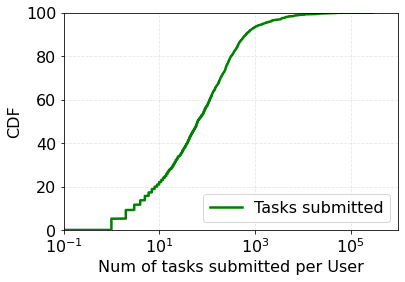

In [23]:
#Plot graph of tasks submitted against CDF
x, y = get_cdf(user_task_count['job_name'])
plt.plot(x, y, label='Tasks submitted',  color='green', linestyle='-')
plt.grid(alpha=.3, linestyle='--')
plt.xscale('log')
plt.xlim(10 ** -1, 10 ** 6)
plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('Num of tasks submitted per User')
plt.ylabel('CDF')
plt.show()

In [24]:
inst_num_list = list(range(2, 300, 2))+list(range(300, 620, 20))
inst_task_num_ratio_df = get_inst_task_num_ratio(dfa, inst_num_list) * 100

NameError: name 'get_inst_task_num_ratio' is not defined

No handles with labels found to put in legend.


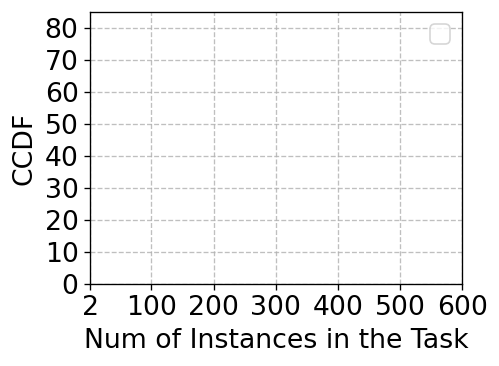

In [25]:


plt.figure(figsize=(4,3), dpi=120)
#plt.plot(inst_task_num_ratio_df.T.num_inst_ratio, label='Portion of instances\namong all instances')
plt.grid(alpha=0.8, linestyle='--')
plt.xlabel('Num of Instances in the Task')
plt.ylabel('CCDF')
plt.xticks((2,100,200,300,400,500,600))
plt.yticks([0,10,20,30,40,50,60,70,80])
plt.xlim(2, 600)
plt.ylim(0, 85)
plt.legend(fontsize=15)

## Temporal Pattern

### Figure 3: Task submission patterns

In [26]:
dfa['start_time'] = parse_date(dfa['start_time'])

NameError: name 'parse_date' is not defined

In [27]:
offset = -600
dfa['hourofyear'] = dfa.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)
dftcc = dfa.groupby('hourofyear').count()[['job_name']].reset_index()
dftcc['hour'] = dftcc.hourofyear + offset
print('Hour 0 Date: {}'.format(dfa[dfa.hourofyear==-offset].start_date.min()))

plt.figure(figsize=(12,3), dpi=120)
num_days = 7
plt.plot(dftcc[(dftcc.hour>=0)&(dftcc.hour<24*num_days+1)].set_index('hour')[['job_name']], color='tomato')
plt.xlabel('Hours from the beginning of a week (Sun. to Sat.)')
plt.ylabel('Num. of Tasks')
plt.grid(alpha=0.8, linestyle='-.')
plt.xlim(0, 24*num_days)
plt.ylim(0, )
plt.yticks([250,500,750,1000,1250])
_ = plt.xticks([24 * x for x in range(num_days+1)])
# plt.savefig('/tmp/figures/{}.pdf'.format('diurnal-pattern-task'),bbox_inches='tight')

AttributeError: 'DataFrame' object has no attribute 'start_date'

In [28]:
hourly_task = get_hourly_task_request(dfa)
hourly_task_data_df = pd.melt(hourly_task, 
    value_vars=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
hourly_task_data_df['hour'] = hourly_task_data_df['hour'].astype('int')

matplotlib.rcParams.update({"font.size": 24})
plt.figure(figsize=(16,4), dpi=120)
highlight_color = 'tomato'
mean_value = hourly_task_data_df.value.mean()
color_df = pd.DataFrame(hourly_task_data_df.groupby('hour').mean())
color_df['color'] = color_df.value.apply(lambda x: '1' if x < mean_value else highlight_color)
color_df['mean_value'] = mean_value
color_palette = sns.blend_palette(color_df.color.tolist(), n_colors=24)

g = sns.boxplot(data=hourly_task_data_df, x='hour', y='value', whis=1, fliersize=0, palette=color_palette)
g.set(ylim=(0, 2100))
g.set(xlabel='Hour of the day (12am - 11pm)')
g.set(ylabel='#Task submitted')
plt.yticks([0,500,1000,1500,2000])
plt.grid(alpha=0.8, linestyle='-.')
matplotlib.rcParams.update({"font.size": 16})
# plt.savefig('/tmp/figures/{}.pdf'.format('overview-task_submission_hourly'),bbox_inches='tight')

NameError: name 'get_hourly_task_request' is not defined

In [29]:
dfw['hourofyear'] = dfw.start_date.apply(lambda c: c.dayofyear * 24 + c.hour)
dfitcr = dfw.groupby('hourofyear').sum()[['plan_cpu','plan_gpu','plan_mem']].reset_index()
dfitcr['hour'] = dfitcr.hourofyear + offset
print('Hour 0 Date: {}'.format(dfa[dfa.hourofyear==-offset].start_date.min()))

plt.figure(figsize=(12,3), dpi=120)
num_days = 7
plt.plot(dfitcr[(dfitcr.hour>=0)&(dfitcr.hour<24*num_days)].set_index('hour')['plan_cpu']/1000, label='10 CPU cores', linestyle='solid')
plt.plot(dfitcr[(dfitcr.hour>=0)&(dfitcr.hour<24*num_days)].set_index('hour')['plan_gpu']/100, label='1 GPU', linestyle='dotted')
plt.plot(dfitcr[(dfitcr.hour>=0)&(dfitcr.hour<24*num_days)].set_index('hour')['plan_mem']/100, label='100 GB Memory', linestyle='dashed')
plt.xlabel('Hours from the beginning of a week (Sun. to Sat.)')
plt.ylabel('Total resource requests')
plt.grid(alpha=0.8, linestyle='-.')
plt.legend(ncol=1, loc='best')
plt.xlim(0, 24*num_days)
_ = plt.xticks([24 * x for x in range(num_days+1)])

AttributeError: 'DataFrame' object has no attribute 'start_date'

In [30]:
plan_cpu_df = get_hourly_task_resource_request(dfw.dropna(subset=['job_name']), metrics='cpu')
plan_cpu_data_df = pd.melt(plan_cpu_df, 
    value_vars=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plan_cpu_data_df['hour'] = plan_cpu_data_df['hour'].astype('int')

matplotlib.rcParams.update({"font.size": 24})
plt.figure(figsize=(16,4), dpi=120)
highlight_color = 'royalblue'
mean_value = plan_cpu_data_df.value.mean()
color_df = pd.DataFrame(plan_cpu_data_df.groupby('hour').mean())
color_df['color'] = color_df.value.apply(lambda x: '1' if x < mean_value else highlight_color)
color_palette = sns.blend_palette(color_df.color.tolist(), n_colors=24)

g = sns.boxplot(data=plan_cpu_data_df, x='hour', y='value', whis=1, fliersize=0, palette=color_palette)
g.set(ylim=(0, 52000))
g.set(xlabel='Hour of the day (12am - 11pm)')
g.set(ylabel='#CPUs requested')
plt.grid(alpha=0.8, linestyle='-.')
matplotlib.rcParams.update({"font.size": 16})
# plt.savefig('/tmp/figures/{}.pdf'.format('overview-cpu_request_hourly'),bbox_inches='tight')

NameError: name 'get_hourly_task_resource_request' is not defined

### Figure 4: Task runtime and wait time

In [31]:
dfphilly = pd.read_csv('philly_runtime.csv')
# Source: https://github.com/msr-fiddle/philly-traces
# Myeongjae Jeon, et al. "Analysis of large-scale multi-tenant GPU clusters for DNN training workloads." USENIX ATC'19

FileNotFoundError: [Errno 2] File philly_runtime.csv does not exist: 'philly_runtime.csv'

In [32]:
plot_data_cdfs([dfa.runtime_i.dropna(),dfphilly.runtime.dropna()], ['PAI','Philly'],
               xticks=[10,100,1000,10000,10**5,10**6], xlim=[10,10**6],
               xlog=True, xlabel='Task runtime (sec)', loc='lower right')

NameError: name 'plot_data_cdfs' is not defined

In [33]:
data_df = dfa
median_time = data_df.runtime_i.median()
data_df['wait_over_completion'] = data_df['wait_time']/data_df['runtime']
plot_data_cdfs([100*data_df[data_df.runtime_i > median_time]['wait_over_completion'].dropna(),
                100*data_df['wait_over_completion'].dropna(),
                100*data_df[data_df.runtime_i <= median_time]['wait_over_completion'].dropna()],
               ['Long 50% tasks','All tasks','Short 50% tasks'], xlim=[0,100], 
               xlabel='wait_time / completion_time (%)', figsize=(4,3))

AttributeError: 'DataFrame' object has no attribute 'runtime_i'

### Figure 5: Task wait time and runtime by GPU requests

In [34]:
data_df = dfa
data = [data_df[data_df.plan_gpu < 25].wait_time.dropna(),
        data_df[(data_df.plan_gpu >= 25)&(data_df.plan_gpu < 50)].wait_time.dropna(),
        data_df[(data_df.plan_gpu >= 50)&(data_df.plan_gpu < 100)].wait_time.dropna(),
        data_df[(data_df.plan_gpu ==100)].wait_time.dropna(),
        data_df[(data_df.plan_gpu > 100)].wait_time.dropna()]
data_label = ['< 25% GPU', '[25%, 50%) GPU', '[50%, 100%) GPU', '1 GPU','> 1 GPU']
plot_data_cdfs(data, datalabel=data_label, figsize=(5,3.75), dpi=120,
               xlog=True, xticks=[1,10,100,1000,10**4,10**5], xlim=(1, 10**5), xlabel='Task wait time (sec)')

AttributeError: 'DataFrame' object has no attribute 'wait_time'

In [35]:
data_df = dfa
data = [data_df[data_df.gpu_type=='T4'].wait_time.dropna(),
        data_df[data_df.gpu_type=='MISC'].wait_time.dropna(),
        data_df[data_df.gpu_type=='P100'].wait_time.dropna(),
        data_df[data_df.gpu_type=='V100'].wait_time.dropna(),
        data_df[data_df.gpu_type=='V100M32'].wait_time.dropna(),]
data_label = ['T4', 'MISC', 'P100', 'V100', 'V100M32']
plot_data_cdfs(data, datalabel=data_label, figsize=(5,3.75), dpi=120,
               xlog=True, xticks=[1,10,100,1000,10**4,10**5], xlim=(1, 10**5), xlabel='Task wait time (sec)')

AttributeError: 'DataFrame' object has no attribute 'wait_time'

Text(0.5, 0, 'Proportion of Tasks (%)')

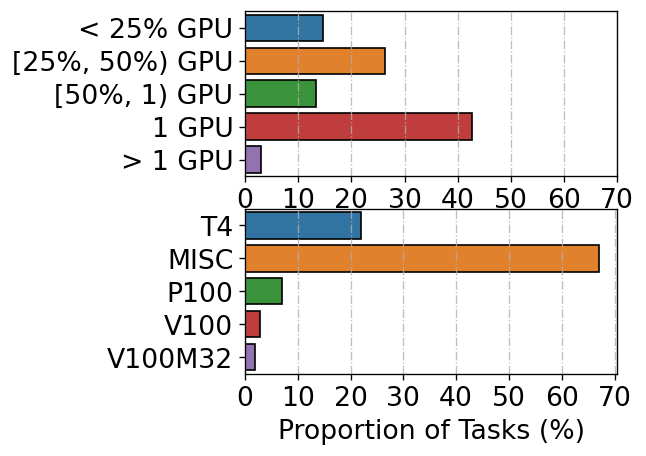

In [36]:
data_df = dfa
data = [len(data_df[data_df.plan_gpu < 25]),
        len(data_df[(data_df.plan_gpu >= 25)&(data_df.plan_gpu < 50)]), 
        len(data_df[(data_df.plan_gpu >= 50)&(data_df.plan_gpu < 100)]), 
        len(data_df[(data_df.plan_gpu ==100)]),
        len(data_df[(data_df.plan_gpu > 100)]),
        len(data_df[data_df.gpu_type=='T4']),
        len(data_df[data_df.gpu_type=='MISC']),
        len(data_df[data_df.gpu_type=='P100']),
        len(data_df[data_df.gpu_type=='V100']),
        len(data_df[data_df.gpu_type=='V100M32'])]
data_plot = [100 * i / len(data_df.plan_gpu.dropna()) for i in data]
data_label = ['< 25% GPU', '[25%, 50%) GPU', '[50%, 1) GPU', '1 GPU','> 1 GPU',
'T4','MISC','P100','V100','V100M32']

f, axes = plt.subplots(2, 1, figsize=(4, 4), sharex=False, dpi=120)
rect = sns.barplot(y=data_label[:5], x=data_plot[:5], orient='h', ax=axes[0], edgecolor='black')
axes[0].grid(alpha=0.8, linestyle='-.',axis='x')
axes[0].set_xticks(range(0, 80, 10))
sns.barplot(y=data_label[5:], x=data_plot[5:], orient='h', ax=axes[1], edgecolor='black')
axes[1].grid(alpha=0.8, linestyle='-.',axis='x')
axes[1].set_xticks(range(0, 80, 10))
plt.xlabel('Proportion of Tasks (%)')

In [37]:
data_df = dfa
data_label = ['T4', 'MISC', 'P100', 'V100', 'V100M32']
data=[data_df[(data_df.gpu_type==v) & (data_df.status=='Terminated')].runtime_i.dropna() for v in data_label]
plot_data_cdfs(data, data_label, xlabel="Task runtime (sec)", 
               xticks=[10**x for x in range(1, 7)], xlog=True,
               figsize=(4,3), dpi=120, xlim=[10, 10**6], fontsize=12)

AttributeError: 'DataFrame' object has no attribute 'runtime_i'

## Spatial Pattern

### Figure 6: Task resource request and usage

In [38]:
'''
data_df = dfas
plot_data_cdfs([data_df['plan_cpu'].dropna(), data_df['cpu_usage'].dropna()], ['CPU Request', 'CPU Usage'],
               xlabel='% of CPU', xlim=(0, 6000), ylabel='CDF', xticks=[0,600,2000,4000,6000], dpi=120)
'''

"\ndata_df = dfas\nplot_data_cdfs([data_df['plan_cpu'].dropna(), data_df['cpu_usage'].dropna()], ['CPU Request', 'CPU Usage'],\n               xlabel='% of CPU', xlim=(0, 6000), ylabel='CDF', xticks=[0,600,2000,4000,6000], dpi=120)\n"

In [39]:
data_df = dfas


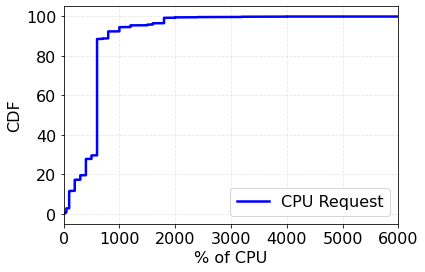

In [40]:
#Plot graph of CPU usage against CDF
x, y = get_cdf(dfd['plan_cpu'].dropna())
plt.plot(x, y, label='CPU Request',  color='blue', linestyle='-')
plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 6000)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('% of CPU')
plt.ylabel('CDF')
plt.show()

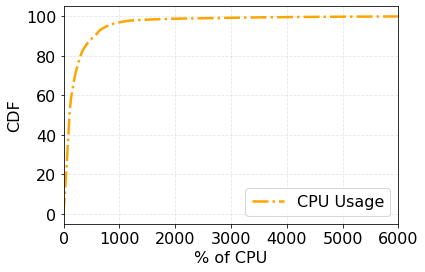

In [41]:
#Plot graph of CPU usage against CDF
x, y = get_cdf(dfd['cpu_usage'].dropna())
plt.plot(x, y, label='CPU Usage',  color='orange', linestyle='-.')
plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 6000)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('% of CPU')
plt.ylabel('CDF')
plt.show()

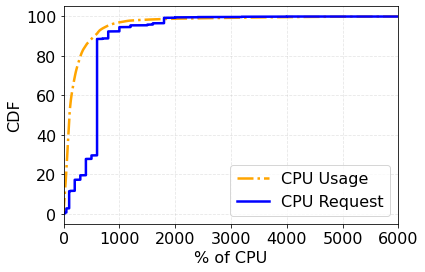

In [42]:
#Plot graph of CPU usage against CDF
x, y = get_cdf(dfd['cpu_usage'].dropna())
plt.plot(x, y, label='CPU Usage',  color='orange', linestyle='-.')
a, b = get_cdf(dfd['plan_cpu'].dropna())
plt.plot(a, b, label='CPU Request',  color='blue', linestyle='-')

plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 6000)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('% of CPU')
plt.ylabel('CDF')
plt.show()

In [43]:
'''
data_df = dfas
plot_data_cdfs([data_df['plan_gpu'].dropna(), data_df['gpu_wrk_util'].dropna()], ['GPU Request', 'GPU Usage'],
               xlabel='% of GPU', xlim=(0, 600), ylabel='CDF', xticks=[0,100,200,400,600], dpi=120,loc='lower right')
'''

"\ndata_df = dfas\nplot_data_cdfs([data_df['plan_gpu'].dropna(), data_df['gpu_wrk_util'].dropna()], ['GPU Request', 'GPU Usage'],\n               xlabel='% of GPU', xlim=(0, 600), ylabel='CDF', xticks=[0,100,200,400,600], dpi=120,loc='lower right')\n"

In [44]:
data_df = dfas
data_df['gpu_wrk_util'].dropna()

0          0.333333
1          0.333333
2          8.910394
3          8.910394
4          2.384298
            ...    
567121     0.000000
567122     0.000000
567123     0.000000
567124     0.000000
567125    36.390805
Name: gpu_wrk_util, Length: 567126, dtype: float64

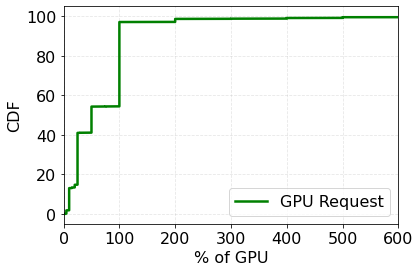

In [45]:
#Plot graph of GPU usage against CDF
x, y = get_cdf(dfa['plan_gpu'].dropna())
plt.plot(x, y, label='GPU Request',  color='green', linestyle='-')
plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 600)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('% of GPU')
plt.ylabel('CDF')
plt.show()

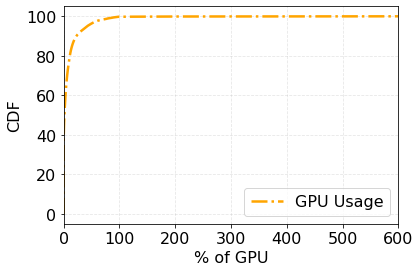

In [46]:
#Plot graph of GPU usage against CDF
x, y = get_cdf(dfd['gpu_wrk_util'].dropna())
plt.plot(x, y, label='GPU Usage',  color='orange', linestyle='-.')
plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 600)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('% of GPU')
plt.ylabel('CDF')
plt.show()

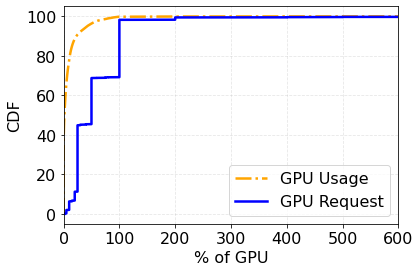

In [47]:
#Plot graph of CPU usage against CDF
x, y = get_cdf(dfd['gpu_wrk_util'].dropna())
plt.plot(x, y, label='GPU Usage',  color='orange', linestyle='-.')
a, b = get_cdf(dfd['plan_gpu'].dropna())
plt.plot(a, b, label='GPU Request',  color='blue', linestyle='-')

plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 600)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('% of GPU')
plt.ylabel('CDF')
plt.show()

In [48]:
'''
data_df = dfas
plot_data_cdfs([data_df['plan_mem'].dropna(), data_df['avg_gpu_wrk_mem'].dropna()], ['Mem Request', 'Mem Usage'],
               xlabel='GB of Main Memory', xlim=(0, 300), ylabel='CDF', xticks=[0,30,100,200,300], dpi=120)
'''

"\ndata_df = dfas\nplot_data_cdfs([data_df['plan_mem'].dropna(), data_df['avg_gpu_wrk_mem'].dropna()], ['Mem Request', 'Mem Usage'],\n               xlabel='GB of Main Memory', xlim=(0, 300), ylabel='CDF', xticks=[0,30,100,200,300], dpi=120)\n"

In [49]:
data_df = dfas
data_df['avg_gpu_wrk_mem'].dropna()

0         0.069743
1         0.069743
2         0.214487
3         0.214487
4         2.197003
            ...   
567121    0.000000
567122    0.000000
567123    0.366240
567124    0.366240
567125    1.862058
Name: avg_gpu_wrk_mem, Length: 567126, dtype: float64

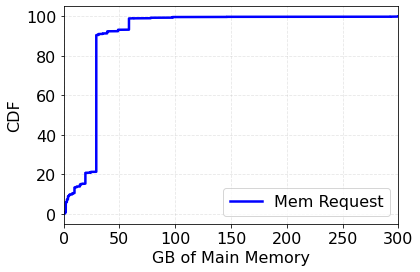

In [50]:
#Plot graph of Memory usage against CDF
x, y = get_cdf(dfa['plan_mem'].dropna())
plt.plot(x, y, label='Mem Request',  color='Blue', linestyle='-')
plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 300)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('GB of Main Memory')
plt.ylabel('CDF')
plt.show()

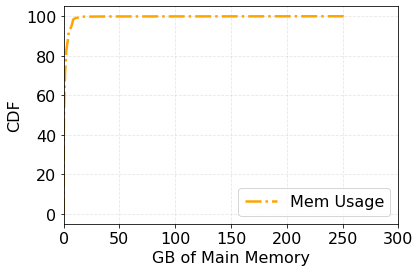

In [51]:
#Plot graph of Memory usage against CDF
x, y = get_cdf(dfd['avg_gpu_wrk_mem'].dropna())
plt.plot(x, y, label='Mem Usage',  color='orange', linestyle='-.')
plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 300)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('GB of Main Memory')
plt.ylabel('CDF')
plt.show()

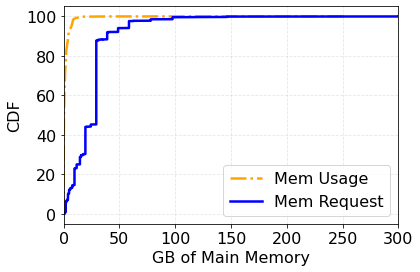

In [52]:
#Plot graph of CPU usage against CDF
x, y = get_cdf(dfd['avg_gpu_wrk_mem'].dropna())
plt.plot(x, y, label='Mem Usage',  color='orange', linestyle='-.')
a, b = get_cdf(dfd['plan_mem'].dropna())
plt.plot(a, b, label='Mem Request',  color='blue', linestyle='-')

plt.grid(alpha=.3, linestyle='--')
#plt.xscale('log')
plt.xlim(0, 300)
#plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('GB of Main Memory')
plt.ylabel('CDF')
plt.show()

In [53]:
'''
pgu_datas, ugp_datas, pgu_label, ugp_label = plan_minus_usg_over_cap_task(dfas)
data = [(100 * ugp_datas[i]).tolist() + (-100 * pgu_datas[i]).tolist() for i in [0,1,2]]
datalabel = ['CPU','GPU','Mem']

from matplotlib.ticker import StrMethodFormatter, NullFormatter
fig, ax = plt.subplots(dpi=120, figsize=(4,3))
for i, d in enumerate(data):
    if type(data) == pd.DataFrame:
        d.dropna(inplace=True)
    x, y = get_cdf(d)
    label = datalabel[i] if datalabel is not None else None
    ax.plot(x, y, label=label, linestyle=linestyle_list[i % len(linestyle_list)][1])
ax.set_xscale('symlog', linscale=1, linthresh=1)
ax.set_yticks([0,20,40,60,80,100])
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
ax.set_xlim([-100, 100])
ax.set_ylim([0,100])
ax.grid(alpha=0.8, linestyle='-.')
plt.ylabel('CDF')
plt.xlabel('(Usage-request)/capacity (%)')
ax.legend()
'''

"\npgu_datas, ugp_datas, pgu_label, ugp_label = plan_minus_usg_over_cap_task(dfas)\ndata = [(100 * ugp_datas[i]).tolist() + (-100 * pgu_datas[i]).tolist() for i in [0,1,2]]\ndatalabel = ['CPU','GPU','Mem']\n\nfrom matplotlib.ticker import StrMethodFormatter, NullFormatter\nfig, ax = plt.subplots(dpi=120, figsize=(4,3))\nfor i, d in enumerate(data):\n    if type(data) == pd.DataFrame:\n        d.dropna(inplace=True)\n    x, y = get_cdf(d)\n    label = datalabel[i] if datalabel is not None else None\n    ax.plot(x, y, label=label, linestyle=linestyle_list[i % len(linestyle_list)][1])\nax.set_xscale('symlog', linscale=1, linthresh=1)\nax.set_yticks([0,20,40,60,80,100])\nax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))\nax.set_xlim([-100, 100])\nax.set_ylim([0,100])\nax.grid(alpha=0.8, linestyle='-.')\nplt.ylabel('CDF')\nplt.xlabel('(Usage-request)/capacity (%)')\nax.legend()\n"

# Cluster Characteristics

## Machine resource usage

### Figure 8: Low in network input and CPU I/O wait time

In [54]:
'''
plot_data_cdf(8*dfws.read.dropna()/(1024**3), xlog=True, figsize=(4,3),
              xticks=[10**-3, 10**-2, 10**-1, 1, 10, 100], xlim=[2*10**-4, 200],
              xlabel='Machine network receive (Gbps)')
'''

"\nplot_data_cdf(8*dfws.read.dropna()/(1024**3), xlog=True, figsize=(4,3),\n              xticks=[10**-3, 10**-2, 10**-1, 1, 10, 100], xlim=[2*10**-4, 200],\n              xlabel='Machine network receive (Gbps)')\n"

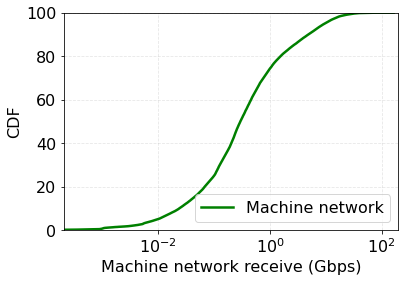

In [55]:
x, y = get_cdf(8*dfws.read.dropna()/(1024**3))
plt.plot(x, y, label='Machine network',  color='green', linestyle='-')
plt.grid(alpha=.3, linestyle='--')
plt.xscale('log')
plt.xlim(2*10**-4, 200)
plt.ylim(0, 100)
plt.legend(loc='lower right')
plt.xlabel('Machine network receive (Gbps)')
plt.ylabel('CDF')
plt.show()

In [56]:
'''
plot_data_cdfs([dfm[x].dropna() for x in ['machine_cpu_iowait','machine_cpu_usr','machine_cpu_kernel']],
               ['iowait','usr','kernel'], xlog=True, figsize=(4,3),
               xticks=[10**-4,10**-3, 10**-2, 10**-1, 1, 10, 100], xlim=[10**-4, 200],
               xlabel='Machine-level CPU usage (%)')
'''

"\nplot_data_cdfs([dfm[x].dropna() for x in ['machine_cpu_iowait','machine_cpu_usr','machine_cpu_kernel']],\n               ['iowait','usr','kernel'], xlog=True, figsize=(4,3),\n               xticks=[10**-4,10**-3, 10**-2, 10**-1, 1, 10, 100], xlim=[10**-4, 200],\n               xlabel='Machine-level CPU usage (%)')\n"

In [57]:
data=dfd

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4934592 entries, 0 to 4934591
Data columns (total 25 columns):
 #   Column           Dtype  
---  ------           -----  
 0   job_name         object 
 1   task_name_x      object 
 2   inst_num         float64
 3   status           object 
 4   start_time       float64
 5   end_time         float64
 6   plan_cpu         float64
 7   plan_mem         float64
 8   plan_gpu         float64
 9   gpu_type         object 
 10  task_name_y      object 
 11  worker_name      object 
 12  inst_id          object 
 13  machine          object 
 14  gpu_name         object 
 15  cpu_usage        float64
 16  gpu_wrk_util     float64
 17  avg_mem          float64
 18  max_mem          float64
 19  avg_gpu_wrk_mem  float64
 20  max_gpu_wrk_mem  float64
 21  read             float64
 22  write            float64
 23  read_count       float64
 24  write_count      float64
dtypes: float64(16), object(9)
memory usage: 978.8+ MB


In [59]:
data.drop('job_name', axis=1, inplace=True)
data.drop('worker_name', axis=1, inplace=True)
data.drop('inst_id', axis=1, inplace=True)
data.drop('machine', axis=1, inplace=True)

In [60]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

inst_num             3
start_time         133
end_time       1380116
plan_cpu          1524
plan_mem          1524
plan_gpu       1861560
gpu_type       1860422
cpu_usage         7413
avg_mem           1470
read                 3
write                3
read_count           3
write_count          3
dtype: int64

In [61]:
Nullvalues=data[data.isnull().any(1)]
#Nullvalues['Label'].value_counts()

In [62]:
data=data.dropna(axis=0, how='any')

In [63]:
zero_cols = [col for col, is_zero in ((data == 0).sum() == data.shape[0]).items() if is_zero]
zero_cols

[]

In [64]:
data.drop(zero_cols, axis=1, inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050484 entries, 0 to 4934590
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   task_name_x      object 
 1   inst_num         float64
 2   status           object 
 3   start_time       float64
 4   end_time         float64
 5   plan_cpu         float64
 6   plan_mem         float64
 7   plan_gpu         float64
 8   gpu_type         object 
 9   task_name_y      object 
 10  gpu_name         object 
 11  cpu_usage        float64
 12  gpu_wrk_util     float64
 13  avg_mem          float64
 14  max_mem          float64
 15  avg_gpu_wrk_mem  float64
 16  max_gpu_wrk_mem  float64
 17  read             float64
 18  write            float64
 19  read_count       float64
 20  write_count      float64
dtypes: float64(16), object(5)
memory usage: 344.2+ MB


In [66]:
data["task_name_x"].replace({"aligraph": 0, "BladeMain": 1, "chief": 2, "DecoderWorker": 3, "evaluator": 4, "JupyterTask": 5, "MWorker": 6, "OpenmpiTracker": 7, "OpenmpiWorker": 8, "OssToVolumeWorker": 9, "ps": 10, "PyTorchWorker": 11, "ReduceTask": 12, "TensorboardTask": 13, "tensorflow": 14, "TfClientWorker": 15, "TransformGraph": 16, "TVMTuneMain": 17, "worker": 18, "xComputeWorker": 19, "LeadingWorker": 20}, inplace=True)
data["status"].replace({"Running": 0, "Terminated": 1, "Failed": 2, "Waiting": 3}, inplace=True)
data["gpu_type"].replace({"MISC": 0, "P100": 1, "T4": 2, "V100": 3, "V100M32": 4}, inplace=True)
data["task_name_y"].replace({"aligraph": 0, "BladeMain": 1, "chief": 2, "DecoderWorker": 3, "evaluator": 4, "JupyterTask": 5, "MWorker": 6, "OpenmpiTracker": 7, "OpenmpiWorker": 8, "OssToVolumeWorker": 9, "ps": 10, "PyTorchWorker": 11, "ReduceTask": 12, "TensorboardTask": 13, "tensorflow": 14, "TfClientWorker": 15, "TransformGraph": 16, "TVMTuneMain": 17, "worker": 18, "xComputeWorker": 19, "LeadingWorker": 20}, inplace=True)
data["gpu_name"].replace({"/dev/nvidia0": 0, "/dev/nvidia1": 1, "/dev/nvidia2": 2, "/dev/nvidia3": 3, "/dev/nvidia4": 4, "/dev/nvidia5": 5, "/dev/nvidia6": 6, "/dev/nvidia7": 7}, inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [67]:
data.columns

Index(['task_name_x', 'inst_num', 'status', 'start_time', 'end_time',
       'plan_cpu', 'plan_mem', 'plan_gpu', 'gpu_type', 'task_name_y',
       'gpu_name', 'cpu_usage', 'gpu_wrk_util', 'avg_mem', 'max_mem',
       'avg_gpu_wrk_mem', 'max_gpu_wrk_mem', 'read', 'write', 'read_count',
       'write_count'],
      dtype='object')

In [68]:
x=pd.DataFrame(data, columns=['task_name_x', 'inst_num', 'status', 'start_time', 'end_time', 'plan_cpu', 'plan_mem', 
                              'plan_gpu', 'gpu_type', 'task_name_y', 'gpu_name','gpu_wrk_util', 'avg_mem', 
                              'max_mem', 'max_gpu_wrk_mem', 'read', 'write', 'read_count', 'write_count'])

In [69]:
x

,task_name_x,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,task_name_y,gpu_name,gpu_wrk_util,avg_mem,max_mem,max_gpu_wrk_mem,read,write,read_count,write_count
0,14,1.0,1,2693235.0,2695847.0,600.0,29.296875,50.0,0,14,6,77.468451,24.306558,30.613281,4.354492,3.515053e+08,2.545430e+06,16733.320000,4261.215238
1,14,1.0,1,3399583.0,3399732.0,600.0,29.296875,100.0,0,14,7,0.333333,1.870295,2.862305,0.836914,8.321684e+08,1.448389e+09,39241.307692,65482.538462
2,14,1.0,1,2152271.0,2158213.0,600.0,29.296875,50.0,0,14,0,4.408403,12.811959,13.503906,4.258789,8.437303e+06,5.633549e+07,1812.241611,2192.090604
99,19,1.0,1,2359994.0,2360345.0,1000.0,19.550781,50.0,2,19,0,35.070423,4.682727,5.905273,2.268555,3.759049e+07,3.823712e+07,3085.657534,2476.452055
100,14,1.0,1,2362291.0,2362331.0,600.0,29.296875,25.0,0,14,0,0.666667,0.438477,1.080078,0.235352,7.681769e+07,7.509876e+07,12181.090909,5211.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934584,11,1.0,1,4725805.0,4726611.0,1600.0,29.296875,100.0,4,11,6,25.341772,16.935255,23.245117,1.077148,1.658300e+09,3.489628e+08,228164.836478,88846.830189
4934585,11,1.0,1,4787176.0,4790407.0,1800.0,58.593750,100.0,1,11,0,55.527446,6.313233,7.283203,11.360352,1.072721e+08,1.069322e+08,10952.470167,1796.441527
4934586,14,1.0,1,4795471.0,4796254.0,600.0,29.296875,25.0,2,14,1,3.986667,18.182559,19.453125,0.291992,2.657259e+07,5.477818e+06,1169.256579,523.631579
4934587,14,1.0,1,4725236.0,4727490.0,100.0,29.296875,25.0,0,14,0,0.000000,3.048873,3.234375,0.200195,7.457338e+08,9.979172e+05,181462.988987,3993.581498


In [70]:
y=pd.DataFrame(data, columns=['avg_gpu_wrk_mem'])
#y=data.columns['cpu_usage', 'memory_usage']

In [71]:
y

,avg_gpu_wrk_mem
0,4.184025
1,0.069743
2,4.212840
99,1.727704
100,0.183051
...,...
4934584,1.053903
4934585,10.578787
4934586,0.287865
4934587,0.198406


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [74]:
x_train.shape

(1640387, 19)

In [75]:
x_test.shape

(410097, 19)

In [76]:
y_train.shape

(1640387, 1)

In [77]:
y_test.shape

(410097, 1)

In [78]:
y_test

,avg_gpu_wrk_mem
4129365,1.220465
1295589,0.387285
682202,0.229042
3934764,0.274247
76219,0.529555
...,...
3872841,2.487072
152489,0.401967
3273695,1.941579
4430406,0.000000


In [79]:
from sklearn.preprocessing import QuantileTransformer

In [80]:
qt = QuantileTransformer()

In [81]:
x_train = qt.fit_transform(x_train)

In [82]:
x_test = qt.fit_transform(x_test)

In [83]:
y_train = qt.fit_transform(y_train)
y_test = qt.fit_transform(y_test)

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
RFclassifier = RandomForestRegressor(n_estimators=20, random_state=0)

In [86]:
RFclassifier.fit(x_train, y_train)

<ipython-input-86-26fe8bfdaa4f>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFclassifier.fit(x_train, y_train)


RandomForestRegressor(n_estimators=20, random_state=0)

In [87]:
y_pred = RFclassifier.predict(x_test)

In [88]:
y_pred

array([0.61671129, 0.34900874, 0.23509758, ..., 0.70616542, 0.        ,
       0.75625378])

In [89]:
y_test

array([[0.61946492],
       [0.37247759],
       [0.2333955 ],
       ...,
       [0.71164982],
       [0.        ],
       [0.75794224]])

In [90]:
RFclassifier.score(x_test, y_test)

0.9939064513270593

In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

In [93]:
mse

0.0005253594202626307

In [94]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0005253594202626307


In [95]:
from sklearn.neighbors import KNeighborsRegressor

In [96]:
KNNclassifier = KNeighborsRegressor(n_neighbors=5)

In [97]:
KNNclassifier.fit(x_train, y_train)

KNeighborsRegressor()

In [98]:
y_pred = KNNclassifier.predict(x_test)

In [99]:
y_pred

array([[0.61941888],
       [0.35454871],
       [0.22775679],
       ...,
       [0.70153947],
       [0.        ],
       [0.7577489 ]])

In [100]:
KNNclassifier.score(x_test, y_test)

0.9892482379689101

In [101]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

In [102]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0009269704355589006


In [103]:
from sklearn.neural_network import MLPRegressor

In [104]:
%%time
MLPclassifier = MLPRegressor(hidden_layer_sizes=(11,11,11), max_iter=500, activation='relu', batch_size='auto', learning_rate_init=0.001).fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 1min 59s


In [105]:
MLPclassifier.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(11, 11, 11), max_iter=500)

In [106]:
y_pred = MLPclassifier.predict(x_test)

In [107]:
MLPclassifier.score(x_test, y_test)

0.9792402897566651

In [108]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

In [109]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.001789812459641103
